In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("./kospi.xlsx", engine="openpyxl",usecols=[0, 1, 2, 3, 4], index_col="Date")

In [4]:
## 변동 파생변수 
df["change"] = df['High'] - df['Low']

In [5]:
## 전일변동
df["전일변동"] = df['change'].shift(1)

In [6]:
df["목표가"] = df["Open"] + df['전일변동'] * 0.5

In [7]:
df.head(10)

,Close,Open,High,Low,change,전일변동,목표가
Date,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330
2000-01-11,981.33,992.17,1005.87,981.23,24.64,29.92,1007.130
2000-01-12,955.01,957.98,976.86,949.20,27.66,24.64,970.300
2000-01-13,951.05,955.06,960.73,939.25,21.48,27.66,968.890
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560


In [8]:
import numpy as np

In [9]:
# np.where(조건식, 참인경우 결과, 거짓인 경우 결과)
df["수익률"] = np.where(df['High'] >= df['목표가'], df["Close"]/df['목표가'], 1)

In [10]:
# 누적수익률
# 누적곱 -> cumprod()
df['누적수익률'] = df['수익률'].cumprod()
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률
Date,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682


In [11]:
## CAGR
## 누적수익률 ** (1 / (투자기간/365)) - 1
## 시계열데이터 활용 
## 기간을 구할때는  (마이너스) 사용하면 기간 출력 가능
delta = df.index[-1] - df.index[0]
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1] ** ( 1 / year ) - 1
print("CAGR : ", CAGR * 100)


CAGR :  7.941722848934263


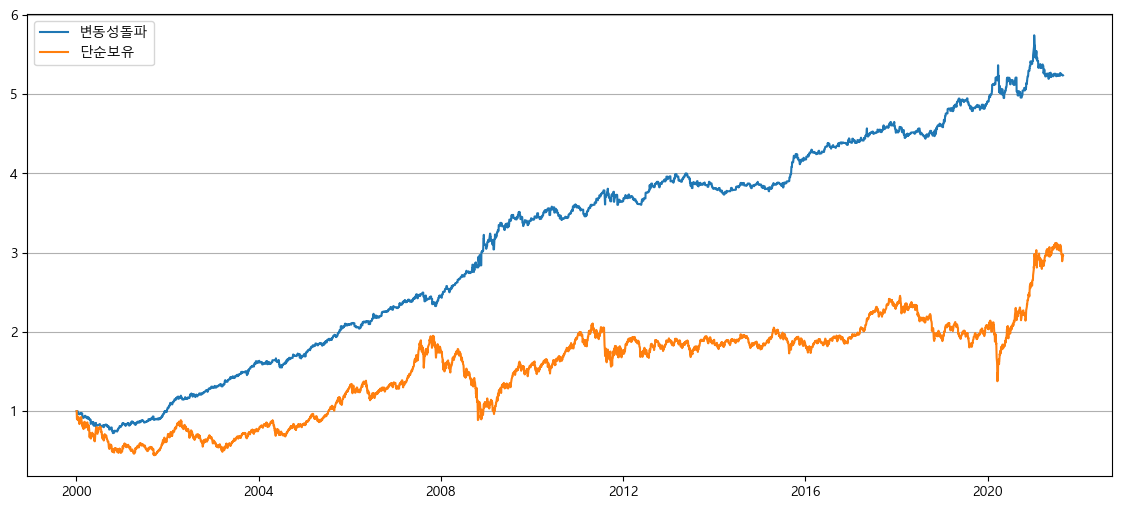

In [12]:
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":
    plt.rc("font", family='AppleGothic')
else:
    plt.rc("font", family="Malgun Gothic")

plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df["누적수익률"], label = '변동성돌파')
plt.plot(df["Close"]/df['Close'].iloc[0]  ,  label="단순보유")
plt.legend()
plt.show()

In [13]:
## MDD 출력 -> 시각화
df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100
df.tail()

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,전고점,DD
Date,,,,,,,,,,,
2021-08-23,3090.21,3086.81,3111.81,3064.65,47.16,73.06,3123.340,1.000000,5.237280,5.739762,8.754419
2021-08-24,3138.30,3119.70,3142.58,3115.23,27.35,47.16,3143.280,1.000000,5.237280,5.739762,8.754419
2021-08-25,3146.81,3148.13,3161.00,3124.25,36.75,27.35,3161.805,1.000000,5.237280,5.739762,8.754419
2021-08-26,3128.53,3151.30,3159.37,3121.04,38.33,36.75,3169.675,1.000000,5.237280,5.739762,8.754419
2021-08-27,3133.90,3116.29,3143.01,3106.97,36.04,38.33,3135.455,0.999504,5.234682,5.739762,8.799672


c:\Users\msi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


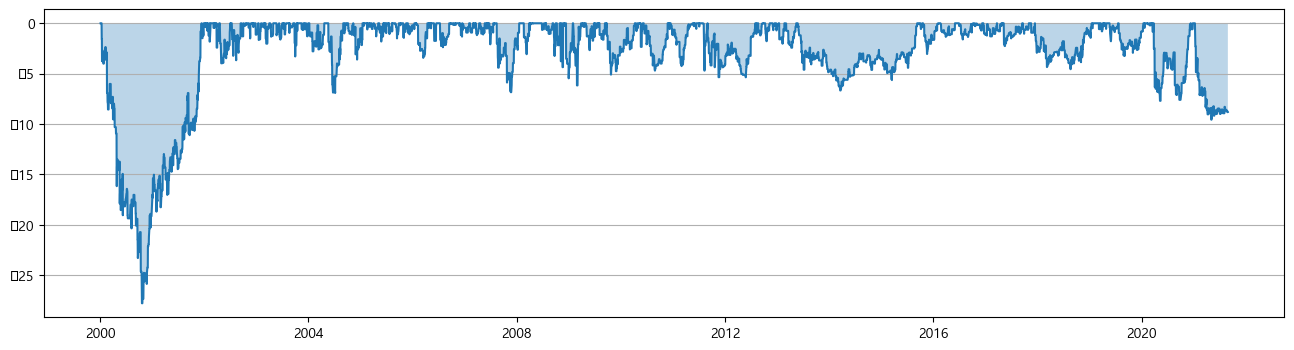

In [14]:
plt.figure(figsize=(16, 4))
plt.grid(True, axis='y')
plt.plot(df['DD'] * - 1)
plt.fill_between(df.index, df['DD'] * -1, alpha=0.3)
plt.show()

In [15]:
print("MDD : ", df['DD'].max())

MDD :  27.779726849588627


In [16]:
# 10일치의 이동 평균선 대입
df['MA10'] = df['Close'].rolling(10).mean()
df.iloc[8:15]

,Close,Open,High,Low,change,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10
Date,,,,,,,,,,,,
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560,0.977794,0.962386,1.0,3.761404,NaN
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090,1.004269,0.966495,1.0,3.350535,976.072
2000-01-18,981.53,992.31,992.85,967.96,24.89,35.34,1009.980,1.000000,0.966495,1.0,3.350535,968.321
2000-01-19,938.78,969.31,977.00,938.74,38.26,24.89,981.755,1.000000,0.966495,1.0,3.350535,963.568
2000-01-20,945.90,927.12,945.90,906.26,39.64,38.26,946.250,1.000000,0.966495,1.0,3.350535,962.079
2000-01-21,925.16,928.55,942.20,911.83,30.37,39.64,948.370,1.000000,0.966495,1.0,3.350535,959.730
2000-01-24,926.77,917.93,944.31,915.70,28.61,30.37,933.115,0.993200,0.959923,1.0,4.007733,953.683


In [17]:
df["매매신호"] = df["Open"] > df['MA10'].shift(1)

In [18]:
df["수익률2"] = np.where(
    (df['매매신호'] == 1) & (df['High'] >= df['목표가']), 
    df['Close'] / df['목표가'], 
    1
)

In [19]:
df['누적수익률2'] = df['수익률2'].cumprod()

In [20]:
df["누적수익률2"].iloc[-1]

2.1876587800244023

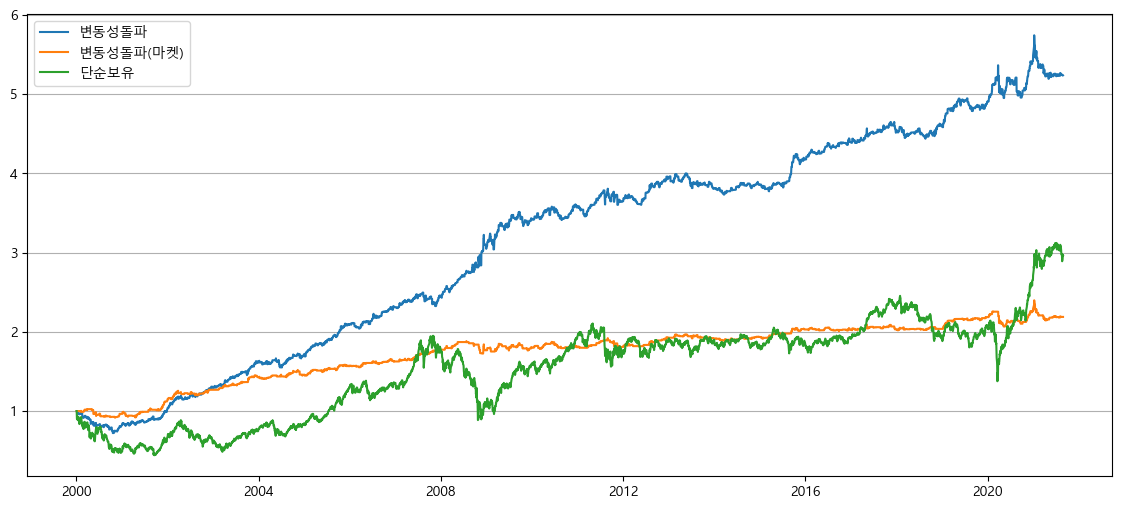

In [21]:
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df['누적수익률'], label = "변동성돌파")
plt.plot(df['누적수익률2'], label = '변동성돌파(마켓)')
plt.plot(df['Close'] / df['Close'].iloc[0] , label="단순보유")
plt.legend()
plt.show()

In [22]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) * 100

In [23]:
df['DD2'].max()

10.556892232762005

c:\Users\msi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


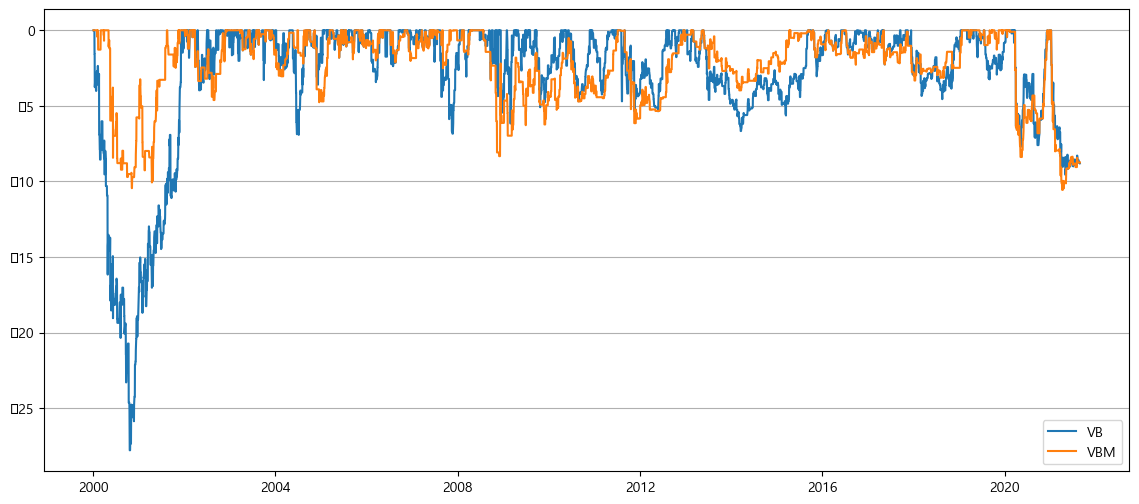

In [24]:
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df["DD"] * -1, label="VB")
plt.plot(df['DD2'] * -1, label="VBM")
plt.legend()
plt.show()